In [2]:
import pandas as pd
import numpy as np
import random
import scipy.integrate as integrate
%matplotlib inline 
import matplotlib.pyplot as plt

Importing the packages and now reading data

In [3]:
df=pd.read_csv('iris.csv')
    

In [85]:
msk = np.random.rand(len(df)) < 0.8

train = pd.DataFrame(df[msk])

test = df[~msk]

In [86]:
train.shape

(122, 5)

In [87]:
test.shape

(28, 5)

In [7]:
test.head

<bound method NDFrame.head of      Sepal length  Sepal width  Petal length  Petal width            class
5             5.4          3.9           1.7          0.4      Iris-setosa
19            5.1          3.8           1.5          0.3      Iris-setosa
22            4.6          3.6           1.0          0.2      Iris-setosa
28            5.2          3.4           1.4          0.2      Iris-setosa
39            5.1          3.4           1.5          0.2      Iris-setosa
45            4.8          3.0           1.4          0.3      Iris-setosa
47            4.6          3.2           1.4          0.2      Iris-setosa
56            6.3          3.3           4.7          1.6  Iris-versicolor
57            4.9          2.4           3.3          1.0  Iris-versicolor
63            6.1          2.9           4.7          1.4  Iris-versicolor
64            5.6          2.9           3.6          1.3  Iris-versicolor
66            5.6          3.0           4.5          1.5  Iris-versic

In [8]:
setosa = ['Iris-setosa']
versicolor = ['Iris-versicolor']
virginica = ['Iris-virginica']

class_setosa = train[train['class'].isin(setosa)]
class_versicolor = train[train['class'].isin(versicolor)]
class_virginica = train[train['class'].isin(virginica)]

In [9]:
class_virginica

,Sepal length,Sepal width,Petal length,Petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica


In [10]:
class_virginica['Sepal length']

100    6.3
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
127    6.1
128    6.4
130    7.4
131    7.9
132    6.4
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
142    5.8
143    6.8
145    6.7
146    6.3
148    6.2
149    5.9
Name: Sepal length, dtype: float64

In [43]:
import math
def mean(numbers):
    return sum(numbers)/float(len(numbers))
mean(class_virginica['Sepal length'])

6.5725000000000007

In [44]:
mean(class_setosa['Petal width'])

0.24186046511627907

In [45]:
mean(class_setosa['Sepal length'])

5.0116279069767442

In [46]:
mean(class_virginica['Sepal width'])

2.9499999999999993

In [47]:
mean(class_virginica['Petal width'])

2.0349999999999997

In [48]:
mean(class_versicolor['Petal width'])

1.3358974358974358

In [49]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)
stdev(class_versicolor['Petal width'])

0.19799944110391546

In [50]:
Summary_setosa_mean = [mean(class_setosa['Sepal length']), mean(class_setosa['Sepal width']),
                  mean(class_setosa['Petal length']),mean(class_setosa['Petal width'])]
Summary_setosa_sd = [stdev(class_setosa['Sepal length']), stdev(class_setosa['Sepal width']),
                      stdev(class_setosa['Petal length']), stdev(class_setosa['Petal width']) ]

Summary_virginica_mean = [mean(class_virginica['Sepal length']), mean(class_virginica['Sepal width']), 
                  mean(class_virginica['Petal length']),mean(class_virginica['Petal width'])]
Summary_virginica_sd = [stdev(class_virginica['Sepal length']), stdev(class_virginica['Sepal width']),
                      stdev(class_virginica['Petal length']), stdev(class_virginica['Petal width']) ]

Summary_versicolor_mean = [mean(class_versicolor['Sepal length']), mean(class_versicolor['Sepal width']), 
                  mean(class_versicolor['Petal length']),mean(class_versicolor['Petal width'])]
Summary_versicolor_sd = [stdev(class_versicolor['Sepal length']), stdev(class_versicolor['Sepal width']),
                      stdev(class_versicolor['Petal length']), stdev(class_versicolor['Petal width']) ]

In [51]:
Summary_virginica_mean, Summary_virginica_sd

([6.5725000000000007,
  2.9499999999999993,
  5.5899999999999999,
  2.0349999999999997],
 [0.6736762899121088,
  0.3328201177351375,
  0.5723545610805801,
  0.25775161965717586])

In [52]:
import math
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

x = 4.8
mean = Summary_setosa_mean[0]
stdev = Summary_setosa_sd[0]

calculateProbability(x, mean, stdev)

0.9289218822515808

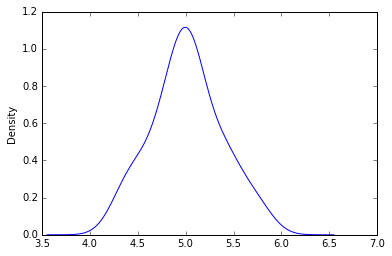

In [53]:
class_setosa['Sepal length'].plot.density()

In [54]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
import scipy.stats
scipy.stats.norm(5.0, 0.329).pdf(4.8)

1.0080181012326572

Hit a problem with the proababilities and are going to keep on for now.

In [56]:
train['Sepal length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
20     5.4
21     5.1
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
29     4.7
30     4.8
31     5.4
32     5.2
33     5.5
      ... 
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
127    6.1
128    6.4
130    7.4
131    7.9
132    6.4
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
142    5.8
143    6.8
145    6.7
146    6.3
148    6.2
149    5.9
Name: Sepal length, dtype: float64

In [57]:
mean(train['Petal width'])

TypeError: 'numpy.float64' object is not callable

In [58]:
stdev(train['Petal width'])

TypeError: 'float' object is not callable

In [59]:
def probability_x_vector(x1,x2,x3,x4):
    sepal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-5.8927419354838726,2)/(2*math.pow(0.8477779072467831,2))))* (1 / (math.sqrt(2*math.pi) * 0.8477779072467831)), x2-0.5,x1+0.5)
    sepal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-3.0387096774193556,2)/(2*math.pow(0.4211308194137039,2))))* (1 / (math.sqrt(2*math.pi) * 0.4211308194137039)), x2-0.5,x2+0.5)
    petal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-3.8516129032258082,2)/(2*math.pow(1.7568673095162275,2))))* (1 / (math.sqrt(2*math.pi) * 1.7568673095162275)), x3-0.5,x3+0.5)
    petal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-1.2241935483870974,2)/(2*math.pow(0.7524886588824152,2))))* (1 / (math.sqrt(2*math.pi) * 0.7524886588824152)), x4-0.5,x4+0.5)
    return sepal_length[0]*sepal_width[0]* petal_length[0]*petal_width[0]


In [60]:
def sepal_length_setosa(a):
    return integrate.quad(lambda x: math.exp(-(math.pow(x-5,2)/(2*math.pow(0.3292735225182537,2))))* (1 / (math.sqrt(2*math.pi) * 0.3292735225182537)), a-0.5,a+0.5)

In [61]:
def probability_x_class(x1,x2,x3,x4,Iris):
    if Iris == 'Iris-setosa':
        sepal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-5,2)/(2*math.pow(0.3292735225182537,2))))* (1 / (math.sqrt(2*math.pi) * 0.3292735225182537)), x1-0.5,x1+0.5)
        sepal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-3.3846153846153846,2)/(2*math.pow(0.37594684782381665,2))))* (1 / (math.sqrt(2*math.pi) * 0.37594684782381665)), x2-0.5,x2+0.5)
        petal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-1.4692307692307689,2)/(2*math.pow(0.18231529391897192,2))))* (1 / (math.sqrt(2*math.pi) * 0.18231529391897192)), x3-0.5,x3+0.5)
        petal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-0.24102564102564103,2)/(2*math.pow(0.09925498454392666,2))))* (1 / (math.sqrt(2*math.pi) * 0.09925498454392666)), x4-0.5,x4+0.5)
    elif Iris == 'Iris-virginica':
        sepal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-6.6309523809523796,2)/(2*math.pow(0.6686309621388903,2))))* (1 / (math.sqrt(2*math.pi) * 0.6686309621388903)), x1-0.5,x1+0.5)
        sepal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-2.9666666666666663,2)/(2*math.pow(0.33761478024132524,2))))* (1 / (math.sqrt(2*math.pi) * 0.33761478024132524)), x2-0.5,x2+0.5)
        petal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-5.5785714285714283,2)/(2*math.pow(0.5820634925913714,2))))* (1 / (math.sqrt(2*math.pi) * 0.5820634925913714)), x3-0.5,x3+0.5)
        petal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-2.0166666666666666,2)/(2*math.pow(0.2621828320054041,2))))* (1 / (math.sqrt(2*math.pi) * 0.2621828320054041)), x4-0.5,x4+0.5)
    elif Iris == 'Iris-versicolor':
        sepal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-5.981395348837208,2)/(2*math.pow(0.5265592780601106,2))))* (1 / (math.sqrt(2*math.pi) * 0.5265592780601106)), x1-0.5,x1+0.5)
        sepal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-2.7953488372093029,2)/(2*math.pow(0.3214205732978086,2))))* (1 / (math.sqrt(2*math.pi) * 0.3214205732978086)), x2-0.5,x2+0.5)
        petal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-4.3255813953488369,2)/(2*math.pow(0.44244613514276354,2))))* (1 / (math.sqrt(2*math.pi) * 0.44244613514276354)), x3-0.5,x3+0.5)
        petal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-1.3418604651162789,2)/(2*math.pow(0.2061351361417055,2))))* (1 / (math.sqrt(2*math.pi) * 0.2061351361417055)), x4-0.5,x4+0.5)
    return sepal_length[0]*sepal_width[0]* petal_length[0]*petal_width[0]

In [62]:
probability_x_class(5.1,3.5,1.4,0.2, 'Iris-versicolor')

1.1695511234552629e-12

In [88]:
test

,Sepal length,Sepal width,Petal length,Petal width,class
3,4.6,3.1,1.5,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor


In [64]:
probability_x_class(test[0:3], 'C)

SyntaxError: EOL while scanning string literal (<ipython-input-64-45b83213c469>, line 1)

In [65]:

def bayes_classifier(x1,x2,x3,x4):
        sepal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-5.8927419354838726,2)/(2*math.pow(0.8477779072467831,2))))* (1 / (math.sqrt(2*math.pi) * 0.8477779072467831)), x2-0.5,x1+0.5)
        sepal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-3.0387096774193556,2)/(2*math.pow(0.4211308194137039,2))))* (1 / (math.sqrt(2*math.pi) * 0.4211308194137039)), x2-0.5,x2+0.5)
        petal_length = integrate.quad(lambda x: math.exp(-(math.pow(x-3.8516129032258082,2)/(2*math.pow(1.7568673095162275,2))))* (1 / (math.sqrt(2*math.pi) * 1.7568673095162275)), x3-0.5,x3+0.5)
        petal_width = integrate.quad(lambda x: math.exp(-(math.pow(x-1.2241935483870974,2)/(2*math.pow(0.7524886588824152,2))))* (1 / (math.sqrt(2*math.pi) * 0.7524886588824152)), x4-0.5,x4+0.5)
        
        sepal_length1 = integrate.quad(lambda x: math.exp(-(math.pow(x-5,2)/(2*math.pow(0.3292735225182537,2))))* (1 / (math.sqrt(2*math.pi) * 0.3292735225182537)), x1-0.5,x1+0.5)
        sepal_width1 = integrate.quad(lambda x: math.exp(-(math.pow(x-3.3846153846153846,2)/(2*math.pow(0.37594684782381665,2))))* (1 / (math.sqrt(2*math.pi) * 0.37594684782381665)), x2-0.5,x2+0.5)
        petal_length1 = integrate.quad(lambda x: math.exp(-(math.pow(x-1.4692307692307689,2)/(2*math.pow(0.18231529391897192,2))))* (1 / (math.sqrt(2*math.pi) * 0.18231529391897192)), x3-0.5,x3+0.5)
        petal_width1= integrate.quad(lambda x: math.exp(-(math.pow(x-0.24102564102564103,2)/(2*math.pow(0.09925498454392666,2))))* (1 / (math.sqrt(2*math.pi) * 0.09925498454392666)), x4-0.5,x4+0.5)
        setosa = sepal_length1[0]*sepal_width1[0]* petal_length1[0]*petal_width1[0]

        sepal_length2 = integrate.quad(lambda x: math.exp(-(math.pow(x-6.6309523809523796,2)/(2*math.pow(0.6686309621388903,2))))* (1 / (math.sqrt(2*math.pi) * 0.6686309621388903)), x1-0.5,x1+0.5)
        sepal_width2 = integrate.quad(lambda x: math.exp(-(math.pow(x-2.9666666666666663,2)/(2*math.pow(0.33761478024132524,2))))* (1 / (math.sqrt(2*math.pi) * 0.33761478024132524)), x2-0.5,x2+0.5)
        petal_length2 = integrate.quad(lambda x: math.exp(-(math.pow(x-5.5785714285714283,2)/(2*math.pow(0.5820634925913714,2))))* (1 / (math.sqrt(2*math.pi) * 0.5820634925913714)), x3-0.5,x3+0.5)
        petal_width2 = integrate.quad(lambda x: math.exp(-(math.pow(x-2.0166666666666666,2)/(2*math.pow(0.2621828320054041,2))))* (1 / (math.sqrt(2*math.pi) * 0.2621828320054041)), x4-0.5,x4+0.5)
        virginica = sepal_length2[0]*sepal_width2[0]* petal_length2[0]*petal_width2[0]
    
        sepal_length3 = integrate.quad(lambda x: math.exp(-(math.pow(x-5.981395348837208,2)/(2*math.pow(0.5265592780601106,2))))* (1 / (math.sqrt(2*math.pi) * 0.5265592780601106)), x1-0.5,x1+0.5)
        sepal_width3 = integrate.quad(lambda x: math.exp(-(math.pow(x-2.7953488372093029,2)/(2*math.pow(0.3214205732978086,2))))* (1 / (math.sqrt(2*math.pi) * 0.3214205732978086)), x2-0.5,x2+0.5)
        petal_length3 = integrate.quad(lambda x: math.exp(-(math.pow(x-4.3255813953488369,2)/(2*math.pow(0.44244613514276354,2))))* (1 / (math.sqrt(2*math.pi) * 0.44244613514276354)), x3-0.5,x3+0.5)
        petal_width3 = integrate.quad(lambda x: math.exp(-(math.pow(x-1.3418604651162789,2)/(2*math.pow(0.2061351361417055,2))))* (1 / (math.sqrt(2*math.pi) * 0.2061351361417055)), x4-0.5,x4+0.5)
        versicolor = sepal_length3[0]*sepal_width3[0]* petal_length3[0]*petal_width3[0]
        
        z= (setosa + virginica+ versicolor)/3
        
        setosa_prob = (1/z)*(1/3)*setosa
        virginica_prob = (1/z)*(1/3)*virginica
        versicolor_prob = (1/z)*(1/3)*versicolor
        
        probability = max(setosa_prob,virginica_prob,versicolor_prob)
        label=""
        if max(setosa_prob,virginica_prob,versicolor_prob) == setosa_prob:
            label="Iris-setosa"
            return label
        elif max(setosa_prob,virginica_prob,versicolor_prob) == virginica_prob:
            label="Iris-virginica"
            return label
        elif max(setosa_prob,virginica_prob,versicolor_prob) == versicolor_prob:
            label="Iris-versicolor"
            return label
    

In [66]:
test['class']

5          Iris-setosa
19         Iris-setosa
22         Iris-setosa
28         Iris-setosa
39         Iris-setosa
45         Iris-setosa
47         Iris-setosa
56     Iris-versicolor
57     Iris-versicolor
63     Iris-versicolor
64     Iris-versicolor
66     Iris-versicolor
68     Iris-versicolor
80     Iris-versicolor
89     Iris-versicolor
90     Iris-versicolor
93     Iris-versicolor
97     Iris-versicolor
101     Iris-virginica
109     Iris-virginica
110     Iris-virginica
125     Iris-virginica
126     Iris-virginica
129     Iris-virginica
133     Iris-virginica
141     Iris-virginica
144     Iris-virginica
147     Iris-virginica
Name: class, dtype: object

In [67]:
predicted=[]

for j in range(30):
    predicted.append(j)
predicted

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [89]:
for i in range (len(test)):
    predicted[i] = bayes_classifier(test.iloc[i,0],test.iloc[i,1],test.iloc[i,2],test.iloc[i,3])
predicted

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 28,
 29]

In [123]:
true = 0
for i in range(28):
    if predicted[i] == test.iloc[i,4]:
        true = true + 1
    else:
        true = true
accuracy = true/28*100
print(accuracy)
print(true)

89.28571428571429
25


In [91]:
test1 = test.iloc[np.random.permutation(len(test))]
test1

,Sepal length,Sepal width,Petal length,Petal width,class
106,4.9,2.5,4.5,1.7,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
128,6.4,2.8,5.6,2.1,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor


In [83]:
len(test1)

28

In [93]:
predicted1=[]

for j in range(28):
    predicted1.append(j)
    
for i in range (len(test)):
    predicted1[i] = bayes_classifier(test1.iloc[i,0],test1.iloc[i,1],test1.iloc[i,2],test1.iloc[i,3])
predicted1

['Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica']

In [95]:
virginica

[0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [110]:
tp = []
fp = []
tn = []
fn = []
tpr = []
fpr = [] 
for j in range(28):
    fp.append(0)
    tp.append(0)
    tpr.append(0)
    fpr.append(0)    
    tn.append(0)
    fn.append(0)    
    
for i in range(28):
    if predicted1[i] == "Iris-setosa" and test1.iloc[i,4] == "Iris-setosa":
        tp[i] = tp[i-1] + 1
        fp[i] = fp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1]
    elif predicted1[i] == "Iris-setosa" and test1.iloc[i,4] != "Iris-setosa":
        fp[i] = fp[i-1] + 1
        tp[i] = tp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1]
    elif predicted1[i] != "Iris-setosa" and test1.iloc[i,4] == "Iris-setosa":
        fp[i] = fp[i-1]
        tp[i] = tp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1] + 1
    elif predicted1[i] != "Iris-setosa" and test1.iloc[i,4] != "Iris-setosa":
        fp[i] = fp[i-1]
        tp[i] = tp[i-1]
        tn[i] = tn[i-1] + 1
        fn[i] = fn[i-1] 
    if tp[i] + fn[i] != 0 and tn[i] + fp[i] != 0:
        tpr[i] = tp[i]/(tp[i]+fn[i])
        fpr[i] = fp[i]/(tn[i]+fp[i])
        
print(tpr)
print(fpr)

[0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[0, 1, 0, 1.2]

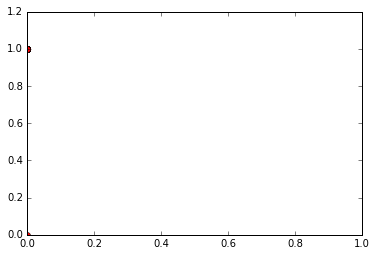

In [111]:
plt.plot(fpr,tpr, 'ro')
plt.axis([0,1,0,1.2])

In [121]:
tp = []
fp = []
tn = []
fn = []
tpr = []
fpr = [] 
for j in range(28):
    fp.append(0)
    tp.append(0)
    tpr.append(0)
    fpr.append(0)    
    tn.append(0)
    fn.append(0)    
    
for i in range(28):
    if predicted1[i] == "Iris-virginica" and test1.iloc[i,4] == "Iris-virginica":
        tp[i] = tp[i-1] + 1
        fp[i] = fp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1]
    elif predicted1[i] == "Iris-virginica" and test1.iloc[i,4] != "Iris-virginica":
        fp[i] = fp[i-1] + 1
        tp[i] = tp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1]
    elif predicted1[i] != "Iris-virginica" and test1.iloc[i,4] == "Iris-virginica":
        fp[i] = fp[i-1]
        tp[i] = tp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1] + 1
    elif predicted1[i] != "Iris-virginica" and test1.iloc[i,4] != "Iris-virginica":
        fp[i] = fp[i-1]
        tp[i] = tp[i-1]
        tn[i] = tn[i-1] + 1
        fn[i] = fn[i-1] 
    if tp[i] + fn[i] != 0 and tn[i] + fp[i] != 0:
        tpr[i] = tp[i]/(tp[i]+fn[i])
        fpr[i] = fp[i]/(tn[i]+fp[i])
        
print(tpr)
print(fpr)

[0, 0.0, 0.0, 0.5, 0.6666666666666666, 0.6666666666666666, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8571428571428571, 0.75, 0.75, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.8]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.0625, 0.0625, 0.058823529411764705, 0.05555555555555555, 0.05555555555555555]


[0, 1, 0, 1.2]

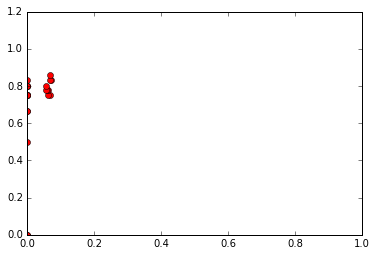

In [120]:
plt.plot(fpr,tpr, 'ro')
plt.axis([0,1,0,1.2])

In [115]:
tp = []
fp = []
tn = []
fn = []
tpr = []
fpr = [] 
for j in range(28):
    fp.append(0)
    tp.append(0)
    tpr.append(0)
    fpr.append(0)    
    tn.append(0)
    fn.append(0)    
    
for i in range(28):
    if predicted1[i] == "Iris-versicolor" and test1.iloc[i,4] == "Iris-versicolor":
        tp[i] = tp[i-1] + 1
        fp[i] = fp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1]
    elif predicted1[i] == "Iris-versicolor" and test1.iloc[i,4] != "Iris-versicolor":
        fp[i] = fp[i-1] + 1
        tp[i] = tp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1]
    elif predicted1[i] != "Iris-versicolor" and test1.iloc[i,4] == "Iris-versicolor":
        fp[i] = fp[i-1]
        tp[i] = tp[i-1]
        tn[i] = tn[i-1]
        fn[i] = fn[i-1] + 1
    elif predicted1[i] != "Iris-versicolor" and test1.iloc[i,4] != "Iris-versicolor":
        fp[i] = fp[i-1]
        tp[i] = tp[i-1]
        tn[i] = tn[i-1] + 1
        fn[i] = fn[i-1] 
    if tp[i] + fn[i] != 0 and tn[i] + fp[i] != 0:
        tpr[i] = tp[i]/(tp[i]+fn[i])
        fpr[i] = fp[i]/(tn[i]+fp[i])
        
print(tpr)
print(fpr)

[0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9, 0.9, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]
[0, 0, 0, 0, 0, 0.2, 0.16666666666666666, 0.16666666666666666, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.07692307692307693, 0.14285714285714285, 0.14285714285714285, 0.13333333333333333, 0.13333333333333333, 0.125, 0.11764705882352941]


[0, 1, 0, 1.2]

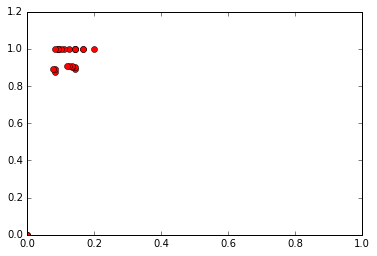

In [107]:
plt.plot(fpr,tpr, 'ro')
plt.axis([0,1,0,1.2])